## Term Account Prediction

We will mainly use scikit learning, pandas, numpy to make an end-to-end pipeline.
This will also enable us to compare multiple different models in our system.

### Data Explortation

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('train.csv')
df.set_index('id', inplace=True)
df.drop(columns=['day', 'month'], inplace=True)

In [34]:
df.shape

(750000, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   duration   750000 non-null  int64 
 10  campaign   750000 non-null  int64 
 11  pdays      750000 non-null  int64 
 12  previous   750000 non-null  int64 
 13  poutcome   750000 non-null  object
 14  y          750000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 91.6+ MB


In [36]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,1006,2,-1,0,unknown,1
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,113,1,-1,0,unknown,0


In [37]:
negative_class = df['y'].value_counts()[0]
positive_class = df['y'].value_counts()[1]
print("The ratio of negative to total is", negative_class/(positive_class+negative_class))

The ratio of negative to total is 0.8793493333333333


As a result of the above information, we have very unbalanced data, with far more of the negative class than of the positive class.

### Data Preprocessing

We have 8 categorical variables and 4 continuous variables.
First we will split the target variable from the input variables.
We will encode the categorical variables. But let's first organize them in lists of cat vs continuous.

In [38]:
y = df['y']
X = df.drop(columns=['y'])
print(X.shape)
print(y.shape)

(750000, 14)
(750000,)


Let's also explore the data in X

In [39]:
X.describe(include='all', percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
count,750000.000000,750000,750000,750000,750000,750000.000000,750000,750000,750000,750000.000000,750000.000000,750000.000000,750000.000000,750000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,NaN,NaN,NaN,4
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,NaN,NaN,unknown
freq,NaN,175541,480759,401683,737151,NaN,411288,645023,486655,NaN,NaN,NaN,NaN,672450
mean,40.926395,NaN,NaN,NaN,NaN,1204.067397,NaN,NaN,NaN,256.229144,2.577008,22.412733,0.298545,NaN
std,10.098829,NaN,NaN,NaN,NaN,2836.096759,NaN,NaN,NaN,272.555662,2.718514,77.319998,1.335926,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,1.000000,-1.000000,0.000000,NaN
1%,24.000000,NaN,NaN,NaN,NaN,-974.000000,NaN,NaN,NaN,7.000000,1.000000,-1.000000,0.000000,NaN
5%,27.000000,NaN,NaN,NaN,NaN,-287.000000,NaN,NaN,NaN,27.000000,1.000000,-1.000000,0.000000,NaN
10%,30.000000,NaN,NaN,NaN,NaN,-63.000000,NaN,NaN,NaN,63.000000,1.000000,-1.000000,0.000000,NaN


We have complete data, so we will not need to fill anything.
I will try to ordinal encode all the categorical variables because then we can apply the same preprocessing steps to them all and that makes things simpler.
For the continuous variables, we will windsorize 'balance' because the Max value is 9X higher than the 99% value so there is some extreme tail distribution, on the lower side, the min is 2X smaller than the 99%.

In [40]:
continuous_features = ['age', 'balance', 'duration', 'pdays', 'campaign', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [41]:
## Correlation Matrix
corr_matrix = X[continuous_features].corr()
corr_matrix

,age,balance,duration,pdays,campaign,previous
age,1.000000,0.062838,-0.004388,-0.021635,0.002052,0.004541
balance,0.062838,1.000000,0.109629,0.010040,-0.027744,0.033897
duration,-0.004388,0.109629,1.000000,0.047555,-0.083016,0.040105
pdays,-0.021635,0.010040,0.047555,1.000000,-0.061465,0.561839
campaign,0.002052,-0.027744,-0.083016,-0.061465,1.000000,-0.026707
previous,0.004541,0.033897,0.040105,0.561839,-0.026707,1.000000


There are not extreme correlations between the continuous variables

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [43]:
# Ordinal Encode the categorical variables
ord_enc = OrdinalEncoder()

In [44]:
preprocessor = ColumnTransformer([
    ('windsorize', PowerTransformer(method='yeo-johnson'), continuous_features),
    ('ord_enc', ord_enc, categorical_features)
])

### Model Selection

We should select a couple of models to train. Since it is a classification task, we will take a logistic regression, a decision tree, and a random forest classifier.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

We will also want to compare the models across some dimension, so we will use accuracy for the beginning and add on more as needed.

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Now we are going to build our pipeline that takes as an input, the raw, unprocessed data, transforms it, splits it, trains a model on it, infers labels and tests its own accuracy.

In [59]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
y_train.value_counts()
print("Proportion of negative class in training set:")
print(y_train.value_counts()[0]/(y_train.value_counts()[1] + y_train.value_counts()[0]))

Proportion of negative class in training set:
0.49999952616471083


In [61]:
y_test.value_counts()
print("Proportion of negative class in test set:")
print(y_test.value_counts()[0]/(y_test.value_counts()[1] + y_test.value_counts()[0]))

Proportion of negative class in test set:
0.5000018953393605


In [62]:
clfs = {'dtc': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lr': LogisticRegression()}

In [63]:
accs = []
y_hats = []

### Training

In [64]:
for clf in clfs:
    pipe = Pipeline([('preprocessor', preprocessor),
                        (clf, clfs[clf])])
    print("Training: ", clf)
    pipe.fit(X_train, y_train)
    print("Predicting: ", clf)
    y_hat = pipe.predict(X_test)
    y_hats.append({clf: y_hat})
    acc = accuracy_score(y_test, y_hat)
    cm = confusion_matrix(y_test, y_hat, labels=pipe.classes_)
    accs.append(acc)

Training:  dtc
Predicting:  dtc
Training:  rf
Predicting:  rf
Training:  lr
Predicting:  lr


### Results

In [65]:
y_hats

[{'dtc': array([0, 1, 1, ..., 1, 0, 0], shape=(263805,))},
 {'rf': array([0, 1, 1, ..., 1, 0, 0], shape=(263805,))},
 {'lr': array([0, 1, 1, ..., 1, 0, 0], shape=(263805,))}]

In [66]:
dtc_y_hats = pd.Series(y_hats[0]['dtc'])

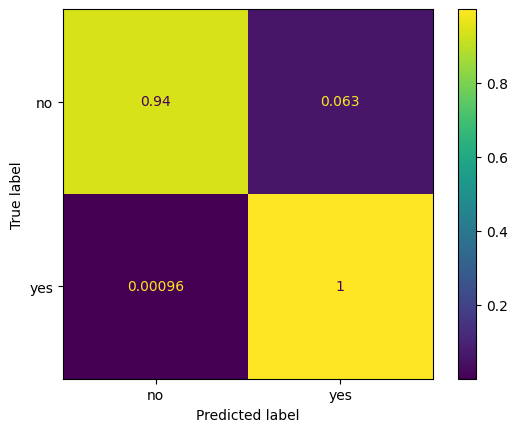

In [104]:
dtc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtc_y_hats, normalize='true'), display_labels=['no', 'yes'])
dtc_cm.plot()

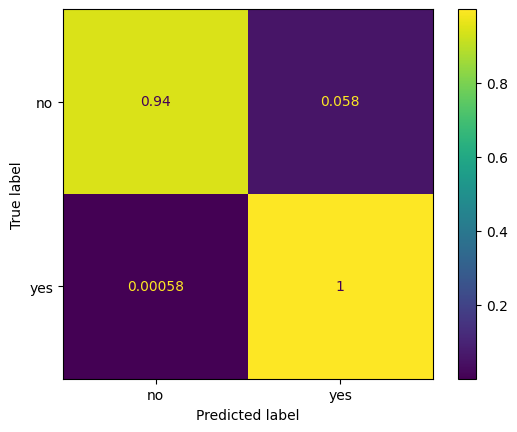

In [103]:
rf_y_hats = pd.Series(y_hats[1]['rf'])
rf_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_hats, normalize='true'), display_labels=['no', 'yes'])
rf_cm.plot()

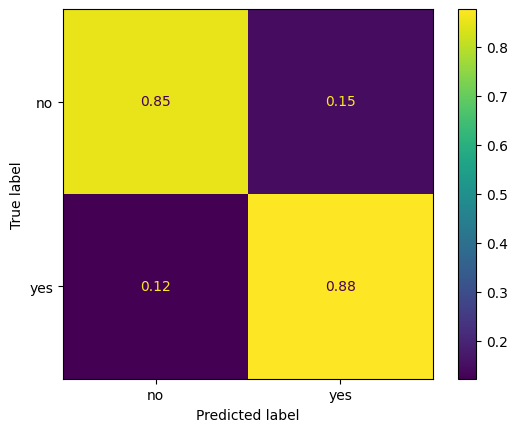

In [102]:
lr_y_hats = pd.Series(y_hats[2]['lr'])
lr_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, lr_y_hats, normalize='true'), display_labels=['no', 'yes'])
lr_cm.plot()

In [71]:
accs_df = pd.DataFrame({'classifier': clfs.keys(), 'accuracy': accs})
accs_df

,classifier,accuracy
0,dtc,0.968257
1,rf,0.970948
2,lr,0.864510


#### Accuracies


Without Oversampling/Balanced Classes
- dtc   0.899020
- rf    0.923193
- lr    0.909220

With Oversampling/Balanced Classes
- dtc   0.968257
- rf    0.970948
- lr    0.909220

### Fine-tuning

We can see that the random forest model is the best at predicting both without balanced classes and with balanced classes. We still haven't fine-tuned the rf model, so we will do that now, then predict on our final test set and submit.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Loading the Test Set
test = pd.read_csv('test.csv')
test.set_index('id', inplace=True)
test.drop(columns=['day', 'month'], inplace=True)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,
750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,224,1,-1,0,unknown
750001,44,management,married,tertiary,no,23,yes,no,cellular,586,2,-1,0,unknown
750002,36,self-employed,married,primary,no,46,yes,yes,cellular,111,2,-1,0,unknown
750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,125,1,-1,0,unknown
750004,28,technician,single,secondary,no,1950,yes,no,cellular,181,1,-1,0,unknown


In [ ]:
## This will be the optimal pipeline
optimal_pipe = Pipeline([('preprocessor', preprocessor),
                         ('rf', RandomForestClassifier(random_state=42))])

In [93]:
## Our parameters
param_grid = {'rf__n_estimators': [100, 200],
              'rf__max_depth': [5, 9],
              'rf__min_samples_leaf': [1, 2]}


In [94]:
## Instantiating the GridSearchCV object
grid_search = GridSearchCV(
    estimator=optimal_pipe,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [95]:
## Finding the best parameters
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('windsorize',
                                                                         PowerTransformer(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'pdays',
                                                                          'campaign',
                                                                          'previous']),
                                                                        ('ord_enc',
                                                                         OrdinalEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 9],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [98]:
optimal_estimator = grid_search.best_estimator_

In [99]:
y_preds_final = optimal_estimator.predict(test)
y_preds_final

array([0, 1, 0, ..., 1, 0, 0], shape=(250000,))

In [100]:
final_df = pd.DataFrame({'id': test.index, 'y': y_preds_final})
final_df.set_index('id', inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   y       250000 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


In [101]:
final_df.to_csv('final_predictions.csv')

### Record of public score on Kaggle
- First submission with off-the-shelf random forest, non-fine-tuned model: 0.84046, 616th place.
- Second submission with somewhat grid-optimized random forest, fine-tuned model: 0.88722 607th place.